In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-on Activity 12.3: Decision-Making

## Objectives
+ To introduce the decision-making problem

## Bayesian Decision Making

So, we learned about credible intervals.
But what if someone asks you to report a single value for $\theta$ in the coin toss example?
What is the correct way of doing this?

This is actually a decision-making problem.
To answer it, you have to quantify the cost of making a mistake and then make a decision that minimizes this cost.
To formalize this concept, assume that we have a random variable $X$ and we have to guess a value for it.
Let $\ell(\theta', \theta)$ be the loss we incur when we guess $\theta'$ and the true value is $\theta$.
This is a completly subjective quantity.
However, here are some ideas:
+ The 0-1 loss:
$$
\ell_{01}(\theta',\theta) = \begin{cases}
1,&\;\text{if}\;\theta'=\theta\\
0,&\;\text{if}\;\theta'\not=\theta.
\end{cases}
= 1_{\{\theta'\}}(\theta).
$$
+ The square loss:
$$
\ell_2(\theta',\theta) = (\theta'-\theta)^2.
$$
+ The absolute loss:
$$
\ell_1(\theta',\theta) = |\theta'-\theta|.
$$

The rational thing to do, when choosing a value for $\theta$ is to minimize our *expected loss* where the expectation is taken over our posterior state of knowledge about $\theta$.
That is, we make our choice by solving this problem:
$$
\theta^* = \min_{\theta'} \mathbb{E}[\ell(\theta',\theta)|x_{1:N}] = \min_{\theta'} \int \ell(\theta',\theta)p(\theta|x_{1:N})d\theta.
$$
This, in general, is not a problem with an analytical solution.
However, for the two special loss functions above the answer is:
+ The choice that minimizes the 0-1 loss is the one maximizing the posterior:
$$
\theta^*_{01} = \arg\max_{\theta} p(\theta|x_{1:N}).
$$
+ The choice that minimizes the square loss is the expectation of the random variable:
$$
\theta^*_2 = \mathbb{E}[\theta|x_{1:N}] = \int \theta p(\theta|x_{1:N})d\theta.
$$
+ The choice that minimizes the absolute loss is the median:
$$
p(\theta \le \theta^*_1 | x_{1:N}) = 0.5.
$$

Let's reintroduce our coin toss example so that w have someething to work with:

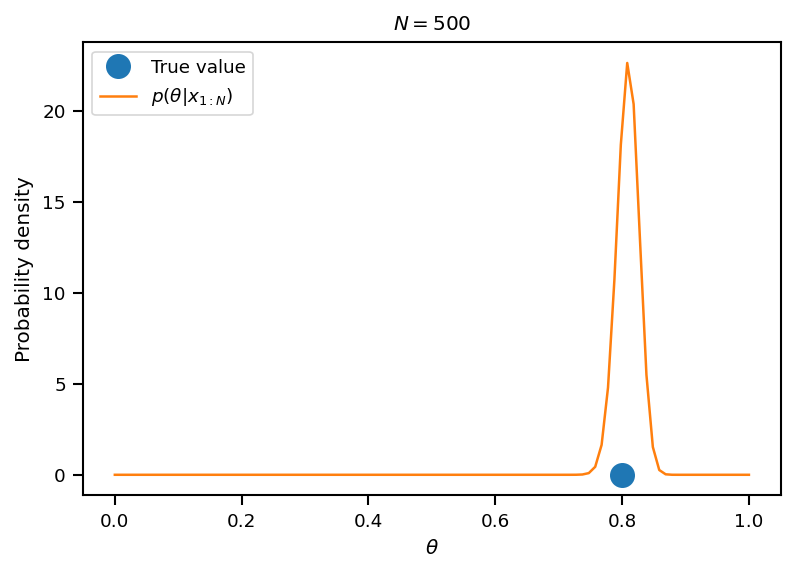

In [12]:
import scipy.stats as st
# Take a fake coin which is a little bit biased
theta_true = 0.8
# This is the random variable corresponding to a coin toss
X = st.bernoulli(theta_true)

# Sample from it a number of times to generate our data = (x1, ..., xN)
N = 500
data = X.rvs(size=N)
# Now we are ready to calculate the posterior which the Beta we have above
alpha = 1.0 + data.sum()
beta = 1.0 + N - data.sum()
Theta_post = st.beta(alpha, beta)
# Now we can plot the posterior PDF for theta
fig, ax = plt.subplots(dpi=150)
thetas = np.linspace(0, 1, 100)
ax.plot([theta_true], [0.0], 'o', markeredgewidth=2, markersize=10, label='True value')
ax.plot(thetas, Theta_post.pdf(thetas), label=r'$p(\theta|x_{1:N})$')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Probability density')
ax.set_title('$N={0:d}$'.format(N))
plt.legend(loc='best')

For the 0-1 loss, we just need to find the maximum of the posterior.
This is an optimization probem with an analytical solution, but we are not going to do it this way.
We will just solve the problem using with a grid search:

In [13]:
idx = np.argmax(Theta_post.pdf(thetas))
theta_star_01 = thetas[idx]
print('theta_star_01 = {0:1.2f}'.format(theta_star_01))

theta_star_01 = 0.81


Now, let's the theta $\theta$ that minimizes the square loss.
We just have to find the expectation of the posterior $p(\theta|x_{1:N})$ (which is just a Beta).
It is:
$$
\theta^*_N = \mathbb{E}[\theta|x_{1:N}] = \frac{1+\sum_{n=1}^Nx_n}{1+\sum_{n=1}^Nx_n + N + 1 - \sum_{n=1}^Nx_n}
= \frac{1 + \sum_{n=1}^Nx_n}{N+2}.
$$

In [14]:
# In the example we had above:
theta_star_2 = Theta_post.expect()
print('theta_star_2 = {0:1.2f}'.format(theta_star_2))

theta_star_2 = 0.81


And finally, here is the median which minimizes the absolute loss:

In [15]:
# In the example we had above:
theta_star_1 = Theta_post.median()
print('theta_star_1 = {0:1.2f}'.format(theta_star_1))

theta_star_1 = 0.81


See them all together in the same plot:

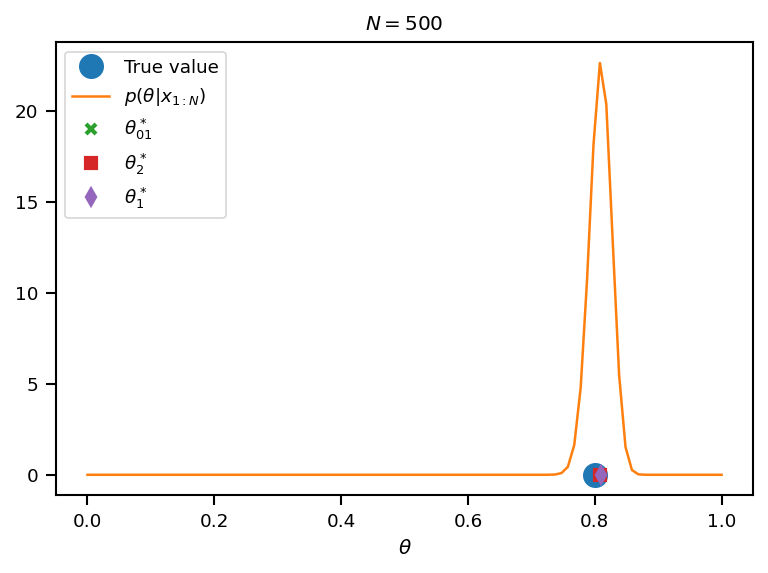

In [16]:
fig, ax = plt.subplots(dpi=150)
ax.plot([theta_true], [0.0], 'o', markeredgewidth=2, markersize=10, label='True value')
ax.plot(thetas, Theta_post.pdf(thetas), label=r'$p(\theta|x_{1:N})$')
ax.plot(theta_star_01, 0, 'x', markeredgewidth=2, label=r'$\theta^*_{01}$')
ax.plot(theta_star_2, 0, 's', markeredgewidth=2, label=r'$\theta^*_{2}$')
ax.plot(theta_star_1, 0, 'd', markeredgewidth=2, label=r'$\theta^*_{1}$')
ax.set_xlabel(r'$\theta$')
ax.set_title('$N={0:d}$'.format(N))
plt.legend(loc='best')

## Questions
+ Repeat the analysis for $N=0, 5, 10, 100$. Do these estimates converge to the true value?
    - Yes